In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
physical_device = tf.config.experimental.list_physical_devices('GPU')
print(f'Device found : {physical_device}')

NameError: ignored

In [31]:
# CNN training and plots

In [5]:
import keras
from keras.models import Sequential
from keras.callbacks import ModelCheckpoint
from keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout
from keras.preprocessing.image import ImageDataGenerator,img_to_array, load_img
from keras.preprocessing import image
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from keras.utils.vis_utils import plot_model

In [6]:
import os
def plot_imgs(directory, top=10):
    all_item_dirs = os.listdir(directory)
    item_files = [os.path.join(directory, file) for file in all_item_dirs][:5]
  
    plt.figure(figsize=(20, 20))
  
    for i, img_path in enumerate(item_files):
        plt.subplot(10, 10, i+1)
    
        img = plt.imread(img_path)
        plt.tight_layout()         
        plt.imshow(img, cmap='gray')

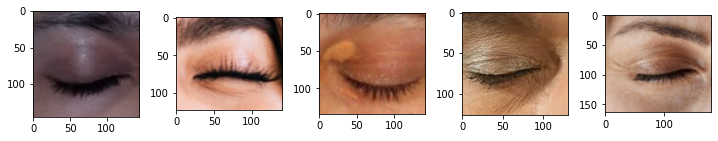

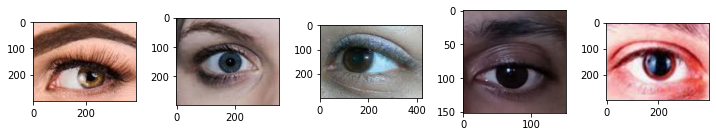

In [9]:
data_path = '/content/drive/MyDrive/Colab Notebooks/archive/dataset_new/train'

directories = ['/Closed','/Open']

for j in directories:
    plot_imgs(data_path+j)

In [10]:
batch_size = 100
train_datagen = ImageDataGenerator(horizontal_flip = True, 
                                  rescale = 1./255, 
                                  zoom_range = 0.2, 
                                  validation_split = 0.1)

test_datagen = ImageDataGenerator(rescale = 1./255)

In [11]:
train_data_path = '/content/drive/MyDrive/Colab Notebooks/archive/dataset_new/train'
test_data_path = '/content/drive/MyDrive/Colab Notebooks/archive/dataset_new/test'

train_set = train_datagen.flow_from_directory(train_data_path, target_size = (256,256),
                                              batch_size = batch_size, 
                                              color_mode = 'grayscale',
                                              class_mode = 'categorical')

test_set = test_datagen.flow_from_directory(test_data_path, target_size = (256,256),
                                              batch_size = batch_size,
                                              shuffle=False, 
                                              color_mode = 'grayscale',
                                              class_mode = 'categorical')

Found 1234 images belonging to 2 classes.
Found 218 images belonging to 2 classes.


In [32]:
classes = 2

model = Sequential()
model.add(Conv2D(16, (4,4), padding = 'same', input_shape = (256,256,1), activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2,2)))

model.add(Conv2D(32, (4,4), padding = 'same', activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2,2)))

model.add(Conv2D(128,(3,3), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2))) 
model.add(Dropout(0.25))

model.add(Flatten())

model.add(Dense(32, activation = 'relu'))

model.add(Dropout(0.5))

model.add(Dense(classes, activation = 'softmax'))

print(model.summary())

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 256, 256, 16)      272       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 128, 128, 16)     0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 128, 128, 32)      8224      
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 64, 64, 32)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 64, 64, 128)       36992     
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 32, 32, 128)     

In [13]:
model.compile(loss = 'categorical_crossentropy',optimizer = 'adam' , metrics = ['accuracy'])

In [15]:
model_path="/content/drive/MyDrive/Colab Notebooks/archive/lastdc.h5"

checkpoint = ModelCheckpoint(model_path, monitor='val_accuracy', verbose=1, 
                              save_best_only=True, mode='max')

callbacks_list = [checkpoint]

In [16]:
num_epochs = 10
training_steps=train_set.n//train_set.batch_size
validation_steps =test_set.n//test_set.batch_size

In [17]:
history = model.fit_generator(train_set, epochs=num_epochs, steps_per_epoch=training_steps,validation_data=test_set,
                    validation_steps=validation_steps, callbacks = callbacks_list)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  


Epoch 1/10
12/12 [==============================] - ETA: 0s - loss: 0.8060 - accuracy: 0.5564 
Epoch 1: val_accuracy improved from -inf to 0.53500, saving model to /content/drive/MyDrive/Colab Notebooks/archive/lastdc.h5
12/12 [==============================] - 227s 18s/step - loss: 0.8060 - accuracy: 0.5564 - val_loss: 0.6559 - val_accuracy: 0.5350
Epoch 2/10
12/12 [==============================] - ETA: 0s - loss: 0.5782 - accuracy: 0.7266
Epoch 2: val_accuracy improved from 0.53500 to 0.89500, saving model to /content/drive/MyDrive/Colab Notebooks/archive/lastdc.h5
12/12 [==============================] - 11s 952ms/step - loss: 0.5782 - accuracy: 0.7266 - val_loss: 0.4009 - val_accuracy: 0.8950
Epoch 3/10
12/12 [==============================] - ETA: 0s - loss: 0.3959 - accuracy: 0.8275
Epoch 3: val_accuracy improved from 0.89500 to 0.93000, saving model to /content/drive/MyDrive/Colab Notebooks/archive/lastdc.h5
12/12 [==============================] - 12s 968ms/step - loss: 0.3959

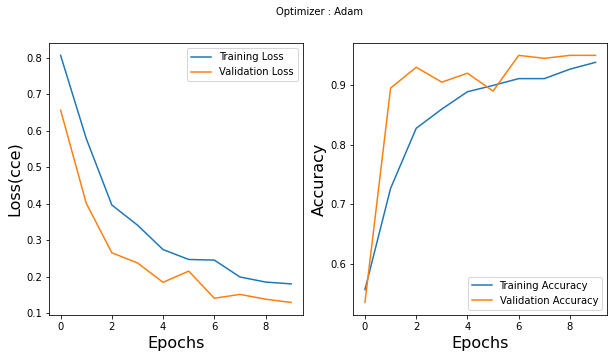

In [30]:
plt.figure(figsize=(10,5))
plt.subplot(1, 2, 1)
plt.suptitle('Optimizer : Adam', fontsize=10)
plt.ylabel('Loss(cce)', fontsize=16)
plt.xlabel('Epochs', fontsize=16)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend(loc='upper right')

plt.subplot(1, 2, 2)
plt.ylabel('Accuracy', fontsize=16)
plt.xlabel('Epochs', fontsize=16)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend(loc='lower right')
plt.show()

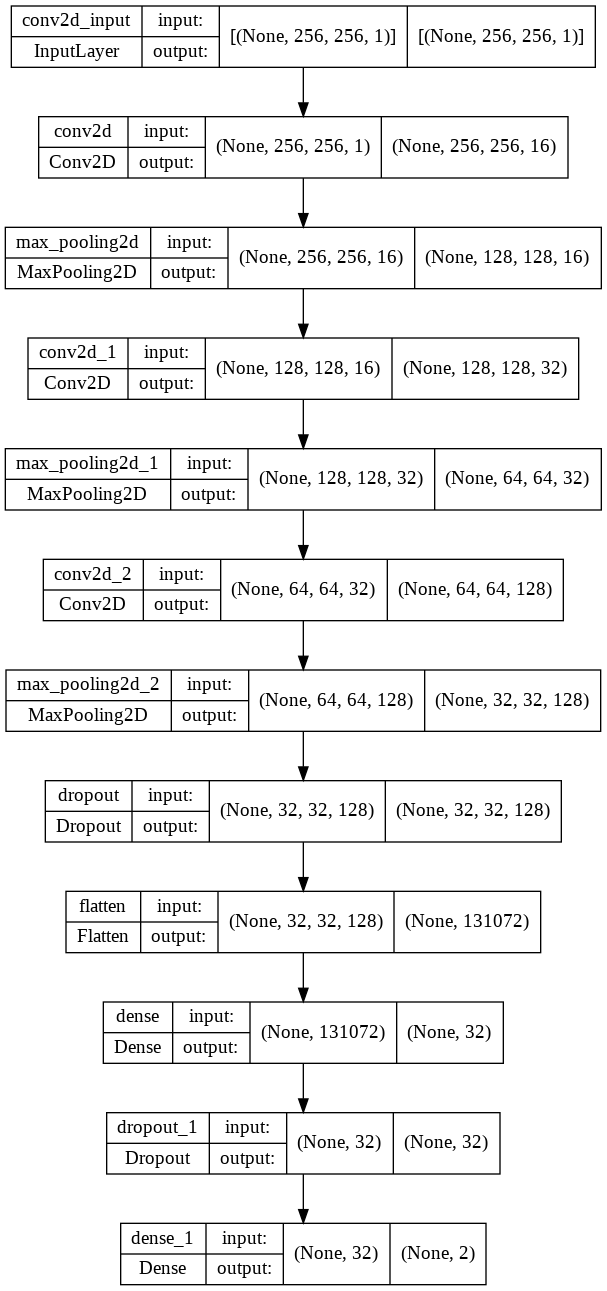

In [19]:
plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

In [ ]:
#Confusion matrix and classification report

In [35]:
def plot_confusion_matrix(cm, classes, normalize=True, title='Confusion matrix', cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.figure(figsize=(5,5))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    if normalize:
            cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
            cm = np.around(cm, decimals=2)
            cm[np.isnan(cm)] = 0.0
            print("Normalized confusion matrix")
    else:
            print('Confusion matrix, without normalization')
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
            plt.text(j, i, cm[i, j],
            horizontalalignment="center",
            color="white" if cm[i, j] > thresh else "black")
            plt.tight_layout()
            plt.ylabel('True label')
            plt.xlabel('Predicted label')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  if sys.path[0] == '':


Confusion Matrix
Normalized confusion matrix
[[104   5]
 [ 14  95]]


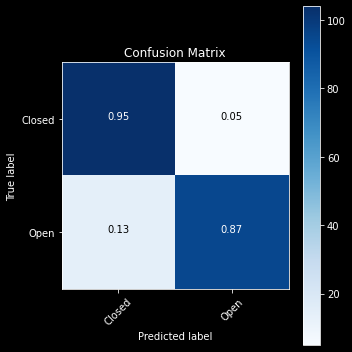

In [38]:
from keras.models import load_model
num_of_test_samples =711
plt.style.use('dark_background')
model = load_model('/content/drive/MyDrive/Colab Notebooks/archive/Train_test_Pro.h5')
from sklearn.metrics import classification_report, confusion_matrix
import itertools 

target_names = []
for key in train_set.class_indices:
    target_names.append(key)

Y_pred = model.predict_generator(test_set)
y_pred = np.argmax(Y_pred, axis=1)
print('Confusion Matrix')

cm = confusion_matrix(test_set.classes, y_pred)
plot_confusion_matrix(cm, target_names, title='Confusion Matrix')
print(confusion_matrix(test_set.classes, y_pred))


In [23]:
print('Classification Report')
print(classification_report(test_set.classes, y_pred, target_names=target_names))

Classification Report
              precision    recall  f1-score   support

      Closed       0.88      0.95      0.92       109
        Open       0.95      0.87      0.91       109

    accuracy                           0.91       218
   macro avg       0.92      0.91      0.91       218
weighted avg       0.92      0.91      0.91       218



In [ ]:
#CNN trained model's testing on random data

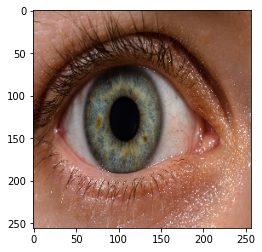

close


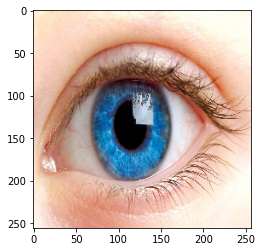

open


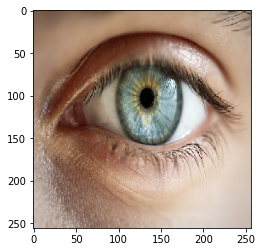

open


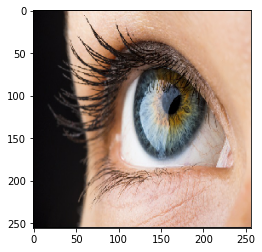

open


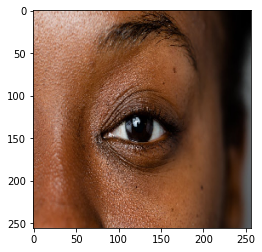

open


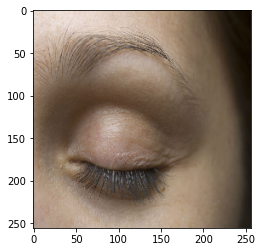

close


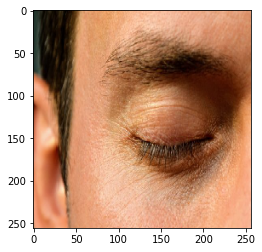

open


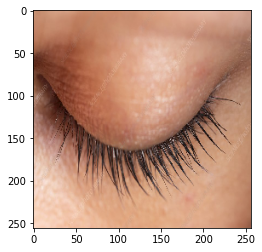

close


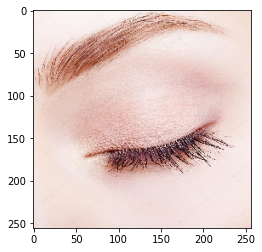

close


In [34]:
from keras.models import load_model
import cv2
model = load_model('/content/drive/MyDrive/Colab Notebooks/archive/Filter_size_number.h5')

dir_path = '/content/drive/MyDrive/Colab Notebooks/archive/eye'

for i in os.listdir(dir_path ):
  # print(i)
    # dir_path = cv2.cvtColor(dir_path,cv2.COLOR_BGR2GRAY)
    img = image.load_img(dir_path+'//'+ i,target_size=(256,256,1))
  #  img = image.load_img(dir_path+'//'+ i)

    # img= cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)


    plt.imshow(img)
    plt.show()

    X = image.img_to_array(img)
    X = cv2.cvtColor(X,cv2.COLOR_BGR2GRAY)

    X = np.expand_dims(X,axis=0)
    # X = np.vstack([X])
    # val = model.predict(X)
    val= np.argmax(model.predict(X))


    if val == 0:
        print("close")
    else:
        print("open")  
    plt.show()       

In [ ]:
#Display filters used in CNN

In [33]:
model = load_model('/content/drive/MyDrive/Colab Notebooks/archive/Filter_size_number.h5')

for num,layer in enumerate(model.layers):
    # check for convolutional layers
    if 'conv' in layer.name:
        # get filter weights
        filters,biases = layer.get_weights()
        print(num,':',layer.name,filters.shape)

0 : conv2d_9 (4, 4, 1, 16)
2 : conv2d_10 (4, 4, 16, 32)


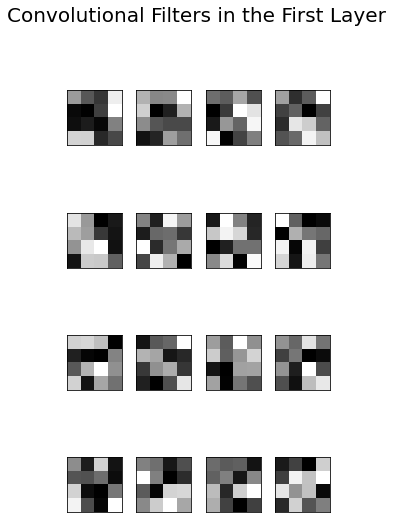

In [27]:
filters,biases = model.layers[0].get_weights()
fig, axs = plt.subplots(nrows=4, ncols=4, figsize=(4,8),
                        subplot_kw={'xticks': [], 'yticks': []})
for k,ax in enumerate(axs.flat):
    ax.imshow(filters[:,:,0,k],interpolation='none',cmap='gray')
plt.tight_layout()
fig.suptitle('Convolutional Filters in the First Layer',fontsize=20)
plt.subplots_adjust(top=0.92)
plt.show()

In [ ]:
#Output of convolution and max pooling layer for an input image

(1, 128, 128, 16)
(1, 128, 128, 32)
(1, 64, 64, 32)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:44: RuntimeWarning: invalid value encountered in true_divide


(1, 64, 64, 32)
(1, 131072)
(1, 32)
(1, 32)
(1, 2)


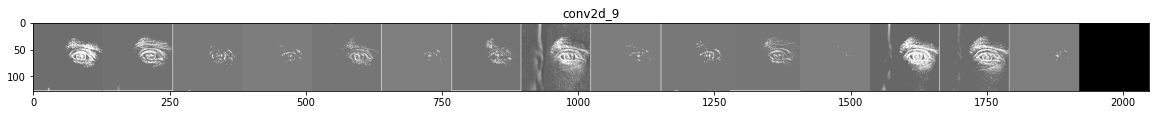

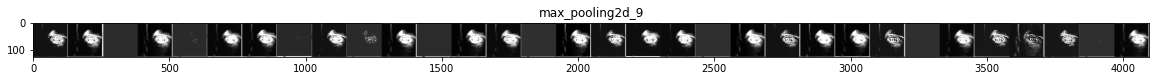

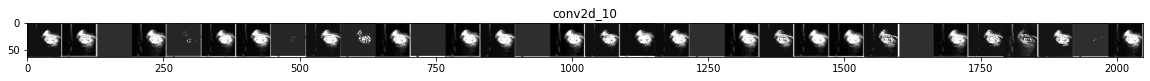

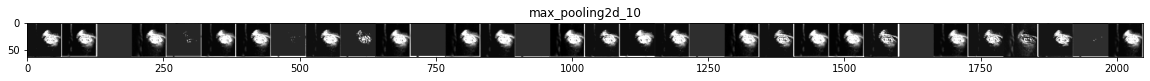

In [28]:
import cv2
from keras.models import load_model
model = load_model('/content/drive/MyDrive/Colab Notebooks/archive/Filter_size_number.h5')
img_path='/content/drive/MyDrive/Colab Notebooks/archive/eye2/fea.jpg' #dog
# Define a new Model, Input= image 
# Output= intermediate representations for all layers in the  
# previous model after the first.
successive_outputs = [layer.output for layer in model.layers[1:]]
#visualization_model = Model(img_input, successive_outputs)
visualization_model = tf.keras.models.Model(inputs = model.input, outputs = successive_outputs)
#Load the input image
img = load_img(img_path, target_size=(256, 256,1))
# Convert ht image to Array of dimension (150,150,3)
x   = img_to_array(img)
x = cv2.cvtColor(x,cv2.COLOR_BGR2GRAY) 
x = cv2.resize(x,(256,256))                          
# x   = x.reshape((1,) + x.shape)


x = np.expand_dims(x,axis=0)
# Rescale by 1/255
x /= 255.0
# Let's run input image through our vislauization network
# to obtain all intermediate representations for the image.
successive_feature_maps = visualization_model.predict(x)
# Retrieve are the names of the layers, so can have them as part of our plot
layer_names = [layer.name for layer in model.layers]
for layer_name, feature_map in zip(layer_names, successive_feature_maps):
  print(feature_map.shape)
  if len(feature_map.shape) == 4:
    
    # Plot Feature maps for the conv / maxpool layers, not the fully-connected layers
   
    n_features = feature_map.shape[-1]  # number of features in the feature map
    size       = feature_map.shape[ 1]  # feature map shape (1, size, size, n_features)
    
    # We will tile our images in this matrix
    display_grid = np.zeros((size, size * n_features))
    
    # Postprocess the feature to be visually palatable
    for i in range(n_features):
      x  = feature_map[0, :, :, i]
      x -= x.mean()
      x /= x.std ()
      x *=  64
      x += 128
      x  = np.clip(x, 0, 255).astype('uint8')
      # Tile each filter into a horizontal grid
      display_grid[:, i * size : (i + 1) * size] = x
# Display the grid
    scale = 20. / n_features
    plt.figure( figsize=(scale * n_features, scale) )
    # plt.figure( figsize=(400,30))
    # plt.figure( figsize=(20,2))
    plt.title ( layer_name )
    plt.grid  ( False )
    plt.imshow( display_grid, aspect='auto', cmap='gray' )